In [2]:
!pip install tensorflow

In [3]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [4]:
actions = ['rabbit', 'butterfly', 'shark']

data = np.concatenate([
    np.load('dataset/seq_rabbit_1669283552.npy'),
    np.load('dataset/seq_butterfly_1669283552.npy'),
    np.load('dataset/seq_shark_1669283552.npy')
], axis=0)

data.shape

(2996, 30, 100)

In [5]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(2996, 30, 99)
(2996,)


In [6]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

c:\users\82104\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(2996, 3)

In [7]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2696, 30, 99) (2696, 3)
(300, 30, 99) (300, 3)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                41984     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
83/85 [============================>.] - ETA: 0s - loss: 5.2728 - acc: 0.6834
Epoch 1: val_acc improved from -inf to 0.78000, saving model to models\model.h5
85/85 [==============================] - 4s 23ms/step - loss: 5.2080 - acc: 0.6855 - val_loss: 1.2446 - val_acc: 0.7800 - lr: 0.0010
Epoch 2/200
85/85 [==============================] - ETA: 0s - loss: 1.1950 - acc: 0.8212
Epoch 2: val_acc improved from 0.78000 to 0.88333, saving model to models\model.h5
85/85 [==============================] - 1s 17ms/step - loss: 1.1950 - acc: 0.8212 - val_loss: 1.2239 - val_acc: 0.8833 - lr: 0.0010
Epoch 3/200
85/85 [==============================] - ETA: 0s - loss: 0.4309 - acc: 0.9121
Epoch 3: val_acc improved from 0.88333 to 0.96333, saving model to models\model.h5
85/85 [==============================] - 1s 17ms/step - loss: 0.4309 - acc: 0.9121 - val_loss: 0.3308 - val_acc: 0.9633 - lr: 0.0010
Epoch 4/200
84/85 [============================>.] - ETA: 0s - loss: 0.1226 - acc: 0.

84/85 [============================>.] - ETA: 0s - loss: 0.0152 - acc: 0.9933
Epoch 30: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 17ms/step - loss: 0.0151 - acc: 0.9933 - val_loss: 0.0149 - val_acc: 0.9933 - lr: 0.0010
Epoch 31/200
83/85 [============================>.] - ETA: 0s - loss: 0.0142 - acc: 0.9940
Epoch 31: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 17ms/step - loss: 0.0143 - acc: 0.9941 - val_loss: 0.0285 - val_acc: 0.9900 - lr: 0.0010
Epoch 32/200
85/85 [==============================] - ETA: 0s - loss: 0.0117 - acc: 0.9955
Epoch 32: val_acc did not improve from 1.00000
85/85 [==============================] - 2s 23ms/step - loss: 0.0117 - acc: 0.9955 - val_loss: 0.0227 - val_acc: 0.9933 - lr: 0.0010
Epoch 33/200
83/85 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.9977
Epoch 33: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 17ms/step - loss: 

Epoch 60/200
83/85 [============================>.] - ETA: 0s - loss: 4.2168e-05 - acc: 1.0000
Epoch 60: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 16ms/step - loss: 4.1588e-05 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 0.9967 - lr: 0.0010
Epoch 61/200
85/85 [==============================] - ETA: 0s - loss: 3.8441e-05 - acc: 1.0000
Epoch 61: val_acc did not improve from 1.00000

Epoch 61: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
85/85 [==============================] - 1s 17ms/step - loss: 3.8441e-05 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 0.9967 - lr: 0.0010
Epoch 62/200
84/85 [============================>.] - ETA: 0s - loss: 3.6329e-05 - acc: 1.0000
Epoch 62: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 17ms/step - loss: 3.6221e-05 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 63/200
83/85 [============================>.] - ETA: 0s - loss: 3.5412e-05 

Epoch 89/200
82/85 [===========================>..] - ETA: 0s - loss: 1.2480e-05 - acc: 1.0000
Epoch 89: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 17ms/step - loss: 1.2493e-05 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 0.9967 - lr: 5.0000e-04
Epoch 90/200
85/85 [==============================] - ETA: 0s - loss: 1.1762e-05 - acc: 1.0000
Epoch 90: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 16ms/step - loss: 1.1762e-05 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 0.9967 - lr: 5.0000e-04
Epoch 91/200
85/85 [==============================] - ETA: 0s - loss: 1.1434e-05 - acc: 1.0000
Epoch 91: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 16ms/step - loss: 1.1434e-05 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 92/200
85/85 [==============================] - ETA: 0s - loss: 1.1201e-05 - acc: 1.0000
Epoch 92: val_acc did not improve from 1.00000
85/85 [==

Epoch 118/200
82/85 [===========================>..] - ETA: 0s - loss: 4.0632e-06 - acc: 1.0000
Epoch 118: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 17ms/step - loss: 4.2169e-06 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 0.9967 - lr: 2.5000e-04
Epoch 119/200
85/85 [==============================] - ETA: 0s - loss: 4.0907e-06 - acc: 1.0000
Epoch 119: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 17ms/step - loss: 4.0907e-06 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 120/200
85/85 [==============================] - ETA: 0s - loss: 3.9984e-06 - acc: 1.0000
Epoch 120: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 16ms/step - loss: 3.9984e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 121/200
85/85 [==============================] - ETA: 0s - loss: 3.9077e-06 - acc: 1.0000
Epoch 121: val_acc did not improve from 1.00000
8

Epoch 147/200
83/85 [============================>.] - ETA: 0s - loss: 1.4712e-06 - acc: 1.0000
Epoch 147: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 16ms/step - loss: 1.4881e-06 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 0.9967 - lr: 2.5000e-04
Epoch 148/200
84/85 [============================>.] - ETA: 0s - loss: 1.4464e-06 - acc: 1.0000
Epoch 148: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 16ms/step - loss: 1.4421e-06 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9967 - lr: 2.5000e-04
Epoch 149/200
85/85 [==============================] - ETA: 0s - loss: 1.3380e-06 - acc: 1.0000
Epoch 149: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 16ms/step - loss: 1.3380e-06 - acc: 1.0000 - val_loss: 8.3317e-04 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 150/200
84/85 [============================>.] - ETA: 0s - loss: 1.3292e-06 - acc: 1.0000
Epoch 150: val_acc did not improve from 1.000

85/85 [==============================] - 1s 17ms/step - loss: 6.3123e-07 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 0.9967 - lr: 1.2500e-04
Epoch 176/200
84/85 [============================>.] - ETA: 0s - loss: 6.1333e-07 - acc: 1.0000
Epoch 176: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 17ms/step - loss: 6.1151e-07 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 0.9967 - lr: 1.2500e-04
Epoch 177/200
83/85 [============================>.] - ETA: 0s - loss: 5.8504e-07 - acc: 1.0000
Epoch 177: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 17ms/step - loss: 5.9528e-07 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000 - lr: 1.2500e-04
Epoch 178/200
82/85 [===========================>..] - ETA: 0s - loss: 5.9290e-07 - acc: 1.0000
Epoch 178: val_acc did not improve from 1.00000
85/85 [==============================] - 1s 16ms/step - loss: 5.8609e-07 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 0.9967 - lr: 1.2500e-04
Epoc

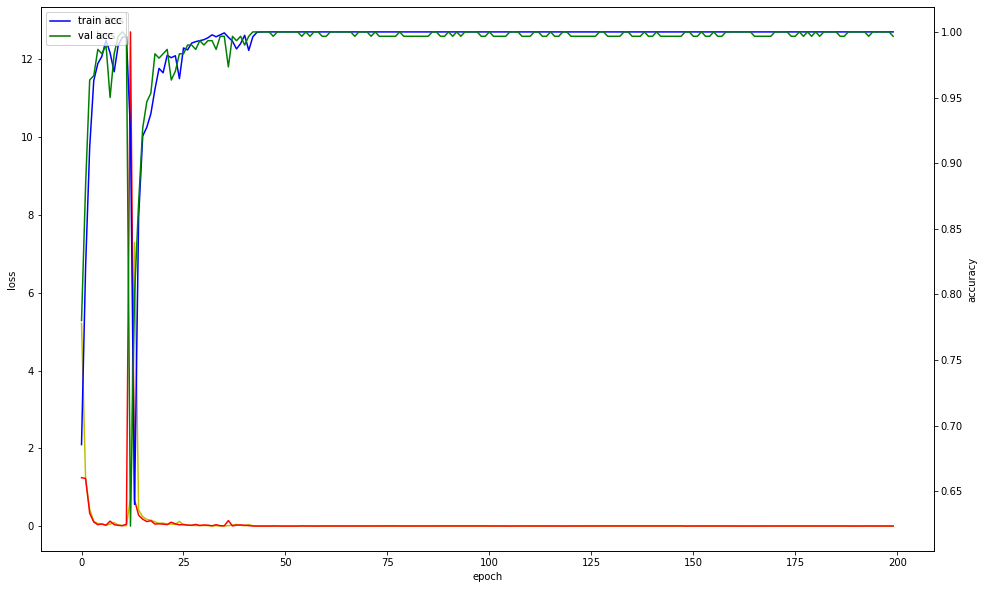

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [11]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

10/10 [==============================] - 0s 9ms/step


array([[[199,   0],
        [  0, 101]],

       [[179,   0],
        [  0, 121]],

       [[222,   0],
        [  0,  78]]], dtype=int64)